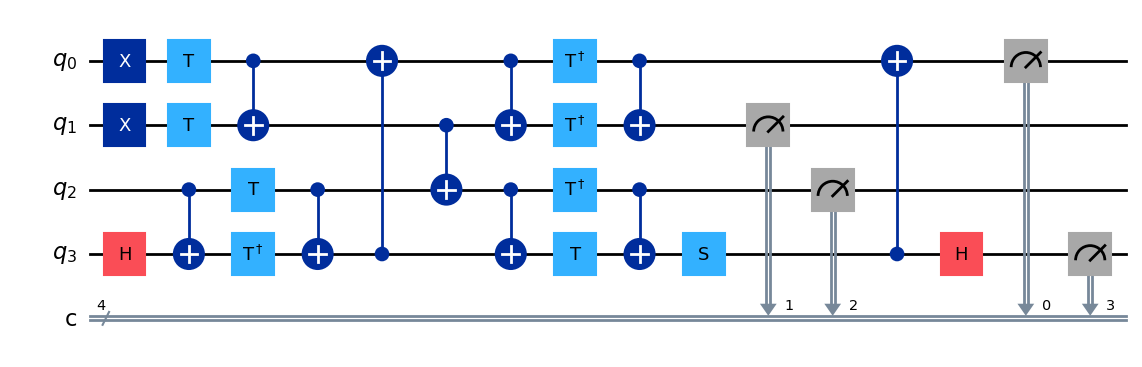

In [2]:
from qiskit.circuit import QuantumCircuit
from qiskit import transpile
from qiskit.providers.fake_provider import GenericBackendV2, Fake5QV1
backend = GenericBackendV2(4)

new_adder=QuantumCircuit.from_qasm_file('adder.qasm')
new_adder.draw("mpl")
#adder_qasm = transpile(new_adder, backend)
#adder_qasm.draw(output='mpl')

In [3]:
new_adder .depth()

12

In [4]:
new_adder.count_ops()

OrderedDict([('cx', 10),
             ('t', 4),
             ('tdg', 4),
             ('measure', 4),
             ('x', 2),
             ('h', 2),
             ('s', 1)])

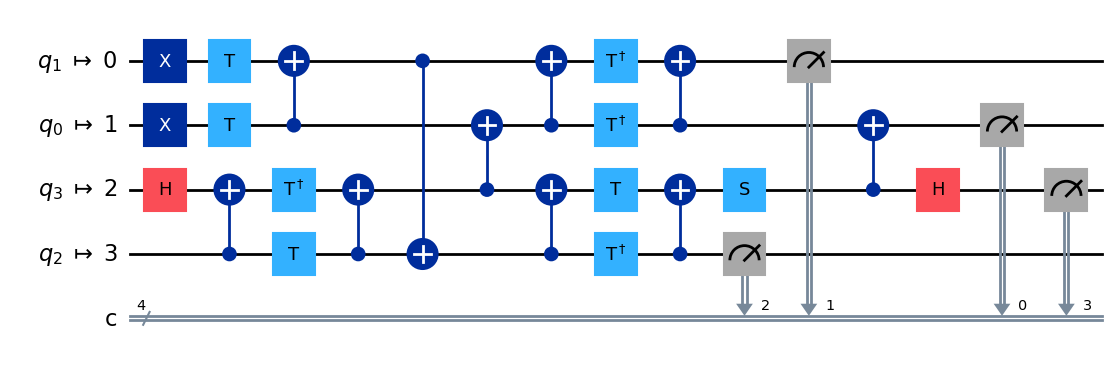

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_circuit_layout
from qiskit.providers.fake_provider import GenericBackendV2, Fake5QV1
backend1 = GenericBackendV2(num_qubits=4,coupling_map=[[0, 1], [0, 2], [1, 0], [1, 3], [2, 0], [2, 3], [3, 1], [3, 2]])
 
trans_adder = transpile(new_adder, backend=backend, optimization_level=3, basis_gates=['cx', 't', 'tdg','x','h','s'] )
trans_adder.draw("mpl")

In [6]:
trans_adder.depth()

12

In [7]:
trans_adder.count_ops()

OrderedDict([('cx', 10),
             ('t', 4),
             ('tdg', 4),
             ('measure', 4),
             ('x', 2),
             ('h', 2),
             ('s', 1)])

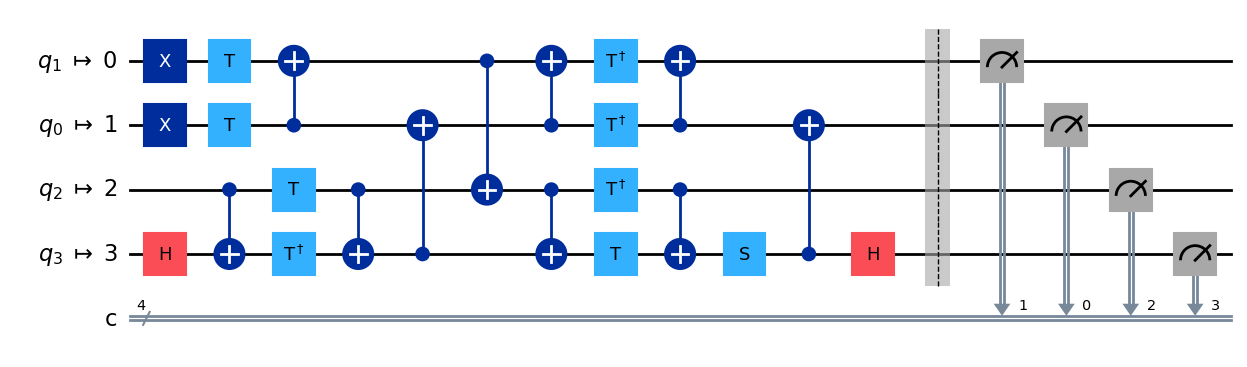

In [25]:
from mqt import qmap

arch = qmap.Architecture(
    4,
    {
        (0, 1),
        (0, 2),
        (1, 0),
        (1, 3),
        (2, 0),
        (2, 3),
        (3, 1),
        (3, 2),
    },
)

a_algo1, res = qmap.compile(new_adder, arch, method="exact")
#a_algo1 = transpile(a_algo, backend1, basis_gates=['rz', 'sx', 'cx'])

#a_algo.decompose().draw(output='mpl')
#a_algo=a_algo1.decompose()
a_algo1.draw(output="mpl")

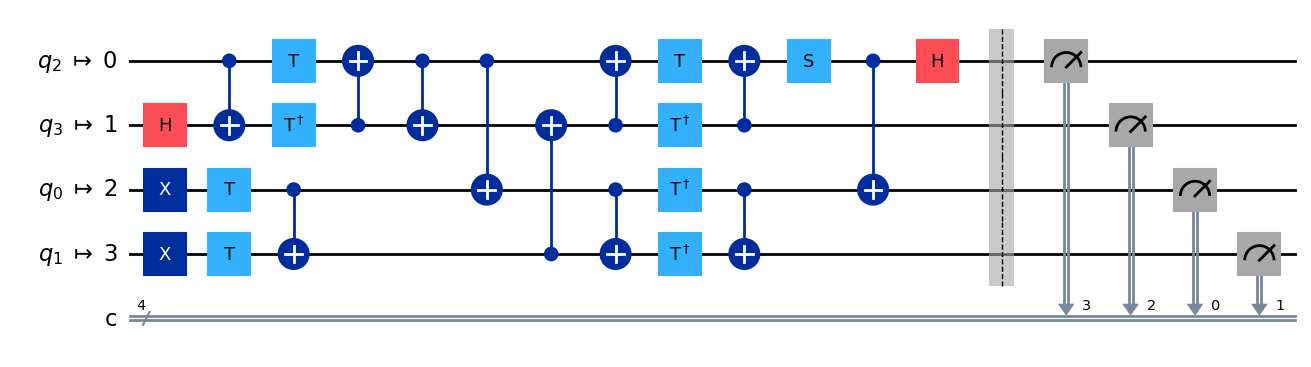

In [26]:
from mqt import qmap

arch = qmap.Architecture(
    4,
    {
        (0, 1),
        (0, 2),
        (1, 0),
        (1, 3),
        (2, 0),
        (2, 3),
        (3, 1),
        (3, 2),
    },
)

a_algo1, res = qmap.compile(new_adder, arch, method="heuristic")
#a_algo1 = transpile(a_algo, backend1, basis_gates=['rz', 'sx', 'cx'])

#a_algo.decompose().draw(output='mpl')
#a_algo=a_algo1.decompose()
a_algo1.draw(output="mpl")

In [22]:
a_algo1.depth()

12

In [18]:
a_algo1.count_ops()

OrderedDict([('cx', 11), ('t', 4), ('tdg', 4), ('x', 2), ('h', 2), ('s', 1)])